## Brazilian e-commerce EDA & RFM Analysis & CLTV with Pyhton

I worked on this dataset to learn Sql and pyhton in my data analyst journey. In this journey, I learned how to create rfm analysis in pyhton and sql. However, I had only theoretical knowledge about cltv. In the data science bootcamp I attended for a short time, I reinforced the subject with an application about cltv. I blended this information and combined cltv and rfm work with an application.

Variable Description

* InvoiceNo: Invoice number that consists 6 digits. If this code starts with letter 'C', it indicates a cancellation.
* StockCode: Product code that consists 5 digits.
* Description: Product name.
* Quantity: The quantities of each product per transaction.
* InvoiceDate: Represents the day and time when each transaction was generated.
* UnitPrice: Product price per unit.
* CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID.
* Country: Name of the country where each customer resides.

## EDA

In [3]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/brnersr/Desktop/data.csv', encoding="ISO-8859-1")# import libraries and dataset

In [4]:
df.head(5) # viewing first 5 data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info() #general info- null or non-null values of columns, type of columns etc. We can decide on type conversions.
# -Invoicedate variable is object. We should convert to datetime type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #convert to datetime

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.shape # 541909 is number of record. 8 is number of variables also known as 'columns'

(541909, 8)

In [8]:
df['StockCode'].nunique() #unique number of  product 

4070

In [9]:
df[df['Quantity']<0] #It is not normal for the quantity variable to be equal to 0, so let's take a look at these records.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [10]:
df[df['Quantity']<0]['InvoiceNo'] #if invoiceno code begin with C,it is canceled order. So, I checked this result. we will delete from dataset below.

141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 10624, dtype: object

In [11]:
df[df['Quantity']<0]['InvoiceNo'].astype("str").str.contains('C') #checking-

141       True
154       True
235       True
236       True
237       True
          ... 
540449    True
541541    True
541715    True
541716    True
541717    True
Name: InvoiceNo, Length: 10624, dtype: bool

In [12]:
df.describe().T #statistical overview of numerical values - if you want to overview of the other types, you should write likes this: "df.describe(include='object')""

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [13]:
df[['Quantity','UnitPrice']].describe().T #esp. focus on "quantity"& "unitprice"

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


In [233]:
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_data(df)

#we can explore dataset quickly with this function.

------------------------------- SHAPE --------------------------------
Rows: 541909
Columns: 8
------------------------------- TYPES --------------------------------
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
-------------------------------- HEAD --------------------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 

In [14]:
missing_data=df.isnull().sum() #how many null values are there? assign these values to the "missing_data"
mis_perc=(missing_data[missing_data>=0]/df.shape[0])*100 #divide the number of empty values greater than 0 by the number of records and multiply by 100
mis_perc.sort_values(ascending=True, inplace=True) #sorting

In [15]:
mis_perc

InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
Description     0.268311
CustomerID     24.926694
dtype: float64

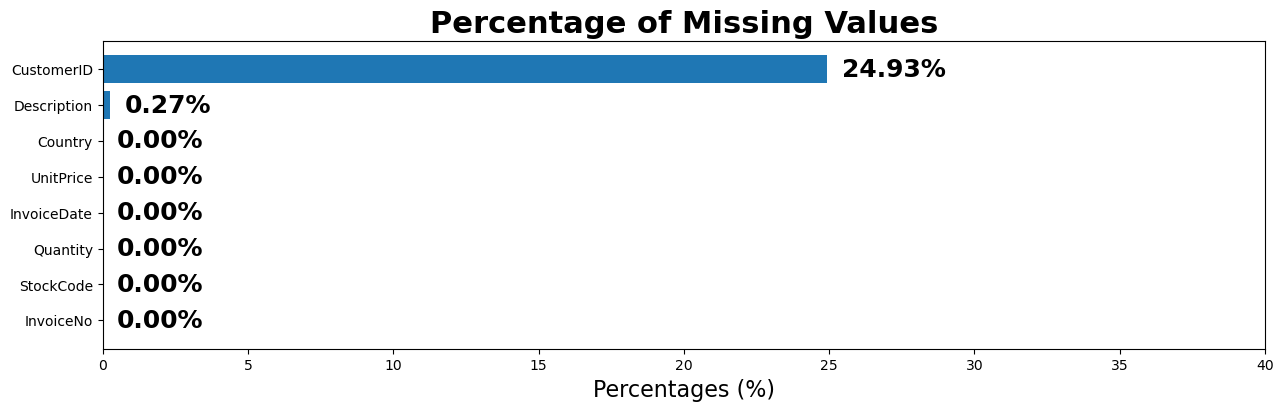

In [16]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(mis_perc.index, mis_perc)

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(mis_perc, mis_perc.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

Empty values are not always deleted. Sometimes they can be filled with different methods. Here we have to delete these variables.

In [17]:
df=df.dropna(subset=['CustomerID','Description'])

In [18]:
df.shape[0] #135080 record are deleted.

406829

In [19]:
df.drop_duplicates(inplace=True) #5268 record was duplicate.

In [20]:
df.shape[0]

401604

In [21]:
df_canceled= df[df['InvoiceNo'].astype(str).str.contains('C')]
#It may be desirable to analyze canceled products. Let's define these records in another dataframe

In [22]:
df= df[~df['InvoiceNo'].astype(str).str.contains('C')] 
#Create a new df for records without stock code c. Records that starting with c invoiceno removed.

In [23]:
df.shape[0]  #8872 record was canceled orders.

392732

In [24]:
#How many units of which product were sold in total?Have a look.

In [24]:
df.groupby("Description").agg({"Quantity":"sum", "UnitPrice":"sum"}).sort_values(by='Quantity',ascending=False)

,Quantity,UnitPrice
Description,,
"PAPER CRAFT , LITTLE BIRDIE",80995,2.08
MEDIUM CERAMIC TOP STORAGE JAR,77916,241.62
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319,138.11
JUMBO BAG RED RETROSPOT,46078,3255.79
WHITE HANGING HEART T-LIGHT HOLDER,36706,5831.82
...,...,...
PINK POLKADOT KIDS BAG,1,1.95
WHITE ROSEBUD PEARL EARRINGS,1,2.55
HEN HOUSE W CHICK IN NEST,1,0.42


In [25]:
df['Total Price']=df['UnitPrice']* df['Quantity'] #Create a new column to show the total amount paid

In [26]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [27]:
#Top 10 invoices with the highest payments

In [28]:
df.groupby('InvoiceNo').agg({'Total Price':'sum'}).sort_values(by='Total Price',ascending=False).head(10)

,Total Price
InvoiceNo,
581483,168469.60
541431,77183.60
556444,38970.00
567423,31698.16
556917,22775.93
572209,22206.00
567381,22104.80
563614,21880.44
550461,21535.90


In [29]:
#what is the total amount of payment by customer and country of purchase?

In [30]:
df.groupby(['CustomerID','Country']).agg({'Total Price':'sum'}).sort_values(by='Total Price',ascending=False)

,,Total Price
CustomerID,Country,
14646.0,Netherlands,280206.02
18102.0,United Kingdom,259657.30
17450.0,United Kingdom,194390.79
16446.0,United Kingdom,168472.50
14911.0,EIRE,143711.17
...,...,...
17956.0,United Kingdom,12.75
16454.0,United Kingdom,6.90
14792.0,United Kingdom,6.20


In [31]:
#what are total payments by country?

In [32]:
df.groupby('Country').agg({'Total Price':'sum'}).sort_values(by='Total Price',ascending=False)

,Total Price
Country,
United Kingdom,7285024.644
Netherlands,285446.340
EIRE,265262.460
Germany,228678.400
France,208934.310
Australia,138453.810
Spain,61558.560
Switzerland,56443.950
Belgium,41196.340


## RFM ANALYSIS

RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value and recency affects retention, a measure of engagement.

RFM factors illustrate these facts:

* The more recent the purchase, the more responsive the customer is to promotions
* The more frequently the customer buys, the more engaged and satisfied they are
* Monetary value differentiates heavy spenders from low-value purchasers

In [34]:
#RFM Recency-Frequency-Monetary

In [ ]:
#R: The date of the customer's last purchase minus today's date or the date to be calculated.
#F: The number of invoices issued to the customer and how much shopping he/she has done.
#M: Total amount of the customer's expenditure.

In [33]:
df['InvoiceDate'].max()  
# The date of the most recent purchase in the dataset. We will use this value for R. Let's even put 2 days later in a new variable and evaluate it.

Timestamp('2011-12-09 12:50:00')

In [34]:
today_date=dt.datetime(2011,12,11) 

In [37]:
#Calculate the RFM values of each customer.

In [35]:
rfm=df.groupby('CustomerID').agg({'InvoiceDate':lambda InvoiceDate:(today_date-InvoiceDate.max()).days,
                                   'InvoiceNo':lambda InvoiceNo:InvoiceNo.nunique(),
                                  'Total Price':lambda TotalPrice:TotalPrice.sum()})

In [36]:
rfm.head()

,InvoiceDate,InvoiceNo,Total Price
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [37]:
#Edit the column names
rfm.columns=['Recency','Frequency','Monetary']

In [41]:
rfm.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


In [40]:
rfm.describe(include='all').T 

,count,mean,std,min,25%,50%,75%,max
Recency,4339.0,93.041484,100.007757,1.0,18.000,51.00,142.500,374.00
Frequency,4339.0,4.271952,7.705493,1.0,1.000,2.00,5.000,210.00
Monetary,4339.0,2048.215924,8984.248352,0.0,306.455,668.56,1660.315,280206.02


If we interpret according to mean values,

Recency: The average recency score is 92.58. This indicates that, on average, customers made their last purchase approximately 93 days ago. A higher recency value suggests less recent engagement with the business.

Frequency: The average frequency score is 5.08. This means that, on average, customers have made around 5 purchases. A higher frequency score indicates more frequent interactions and purchases.

Monetary: The average monetary value is 1893.53. This represents the average amount spent by customers. Higher monetary values reflect higher spending levels and potentially more valuable customers.

#### RFM SCORES: 

In [ ]:
# Let's divide rfm values into slices between 1-5

In [46]:
rfm['recency_score']=pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1]) #shopping in the nearest time earns 5 points. The smaller the number, the higher the score. Inverse proportion

In [45]:
rfm['frequency_score']=pd.qcut(rfm['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5]) #Duplicates error is removed with the #rank method.
# The higher the number, the higher the score. Direct proportion

In [44]:
rfm['monetary_score']=pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5]) # The higher the number, the higher the score. Direct proportion

In [47]:
rfm.head(5).sort_values(by='recency_score',ascending=False)

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,5
12350.0,311,1,334.40,1,1,2
12348.0,76,4,1797.24,2,4,4
12349.0,19,1,1757.55,4,1,4
12347.0,3,7,4310.00,5,5,5


In [48]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Recency          4339 non-null   int64   
 1   Frequency        4339 non-null   int64   
 2   Monetary         4339 non-null   float64 
 3   recency_score    4339 non-null   category
 4   frequency_score  4339 non-null   category
 5   monetary_score   4339 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.9 KB


In [49]:
rfm['rfm_scores']=(rfm['recency_score'].astype(str)+rfm['frequency_score'].astype(str)+rfm['monetary_score'].astype(str)) 
#convert to string values

In [50]:
rfm['rf']=(rfm['recency_score'].astype(str)+rfm['frequency_score'].astype(str)) 

In [51]:
rfm['rf']

CustomerID
12346.0    11
12347.0    55
12348.0    24
12349.0    41
12350.0    11
           ..
18280.0    12
18281.0    12
18282.0    53
18283.0    55
18287.0    34
Name: rf, Length: 4339, dtype: object

In [52]:
rfm['rfm_scores'].sort_values(ascending=False)

CustomerID
15039.0    555
15984.0    555
13784.0    555
13798.0    555
17730.0    555
          ... 
15292.0    111
15180.0    111
15178.0    111
15543.0    111
15668.0    111
Name: rfm_scores, Length: 4339, dtype: object

In [53]:
#We can segment with a regex map. 

In [55]:
segment_mapping={
    r'[1-2][1-2]':'Hibernating',
    r'[1-2][3-4]':'At Risk',
    r'[1-2]5':'Cant Loose Them',
    r'3[1-2]':'Sleep',
    r'33':'Need to attention',
    r'[3-4][4-5]':'Loyal Customers',
    r'41':'Promising',
    r'51':'New Customers',
    r'[4-5][2-3]':'potential loyalist',
    r'5[4-5]':'Champions'}

In [56]:
rfm['customer_segment']=rfm['rf'].replace(segment_mapping,regex=True) 

In [58]:
rfm.head().reset_index() #regex provide segments matched with 'rf'values

,CustomerID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,rfm_scores,rf,customer_segment
0,12346.0,326,1,77183.60,1,1,5,115,11,Hibernating
1,12347.0,3,7,4310.00,5,5,5,555,55,Champions
2,12348.0,76,4,1797.24,2,4,4,244,24,At Risk
3,12349.0,19,1,1757.55,4,1,4,414,41,Promising
4,12350.0,311,1,334.40,1,1,2,112,11,Hibernating


In [59]:
rfm[['customer_segment','Recency','Frequency','Monetary']].groupby('customer_segment').agg({'Recency':'count',
                                                                                            'Frequency':'mean',
                                                                                            'Monetary':'sum'}).reset_index().sort_values('Monetary', ascending=False)
#sorting rfm values by customer segment. 
#Especially in the first 5 groups, the amount earned by the company is very good.
#Special campaigns can be organized for the first 5 group segments

,customer_segment,Recency,Frequency,Monetary
2,Champions,633,12.417062,4331720.610
4,Loyal Customers,819,6.479853,2338892.971
0,At Risk,593,2.878583,640985.781
3,Hibernating,1071,1.101774,522250.562
9,potential loyalist,484,2.010331,501657.820
1,Cant Loose Them,63,8.380952,175776.390
5,Need to attention,187,2.326203,166898.610
8,Sleep,352,1.161932,165402.490
7,Promising,95,1.000000,27452.720
6,New Customers,42,1.000000,16170.940


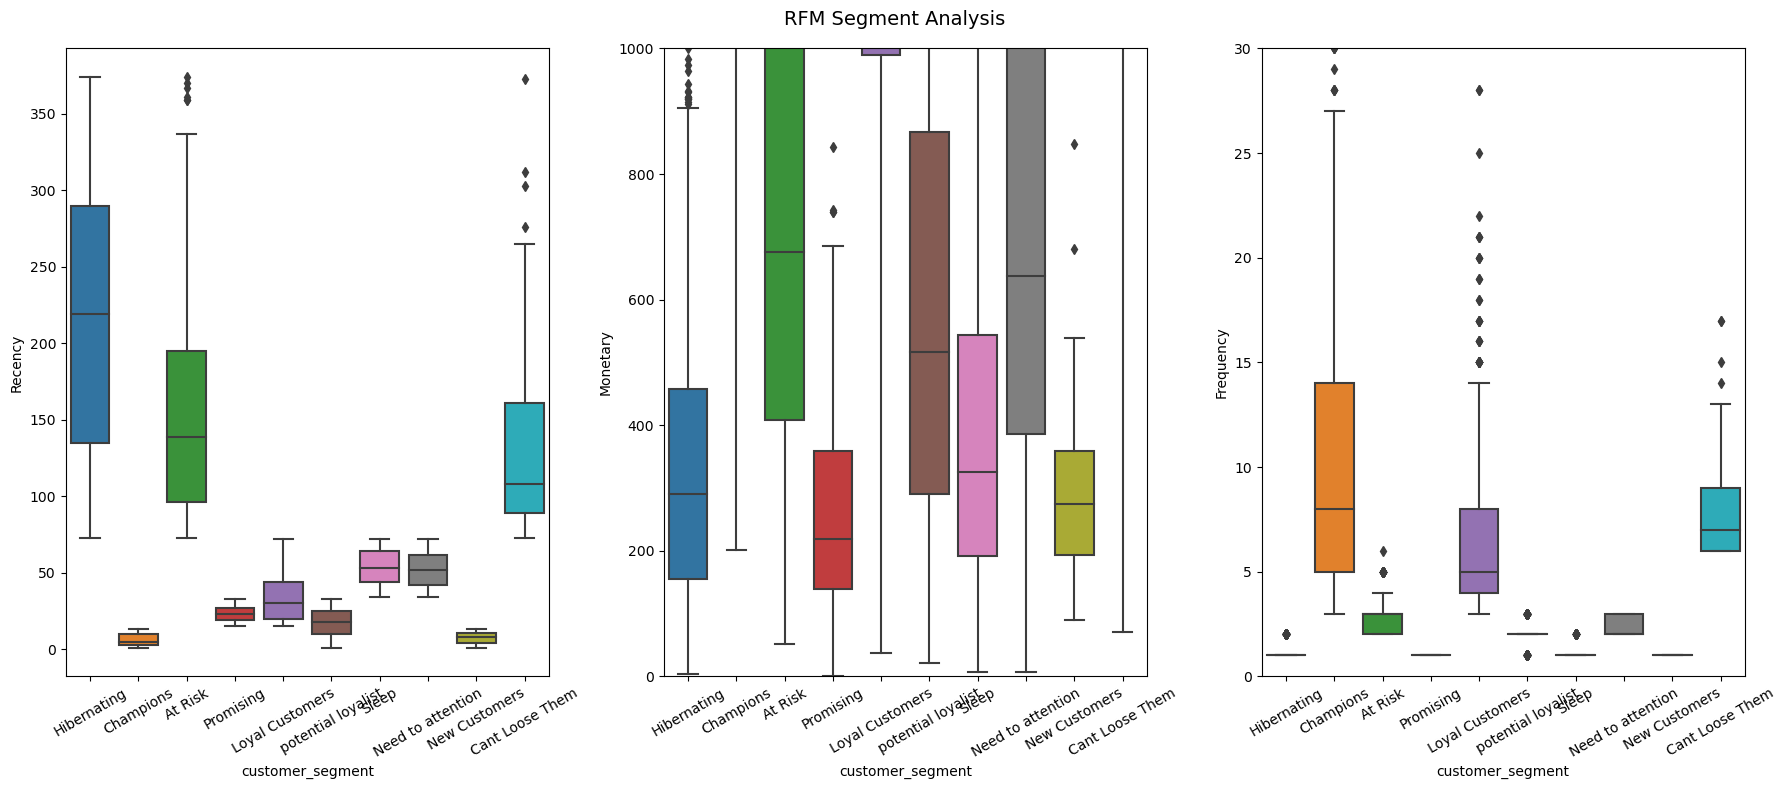

In [61]:
#RFM Segment Analysis:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["Recency", "Monetary", "Frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm, x="customer_segment", y=feature_list[idx])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=30)
    if idx == 1:
        axes[idx].set_ylim([0, 1000])
    if idx == 2:
        axes[idx].set_ylim([0, 30])
plt.tight_layout()
plt.show()


Champions and Loyal Customers are the most valuable segments with high recency, frequency, and monetary values.
Hibernating and At Risk segments show higher recency and moderate to high monetary values, indicating past valuable customers who haven't interacted recently.
New Customers show moderate values across all dimensions, indicating potential for growth.
Promising, Potential Loyalist, Sleep, Can't Lose Them, and Need to Attention segments have lower values across dimensions, indicating they require different strategies to increase engagement and spending.

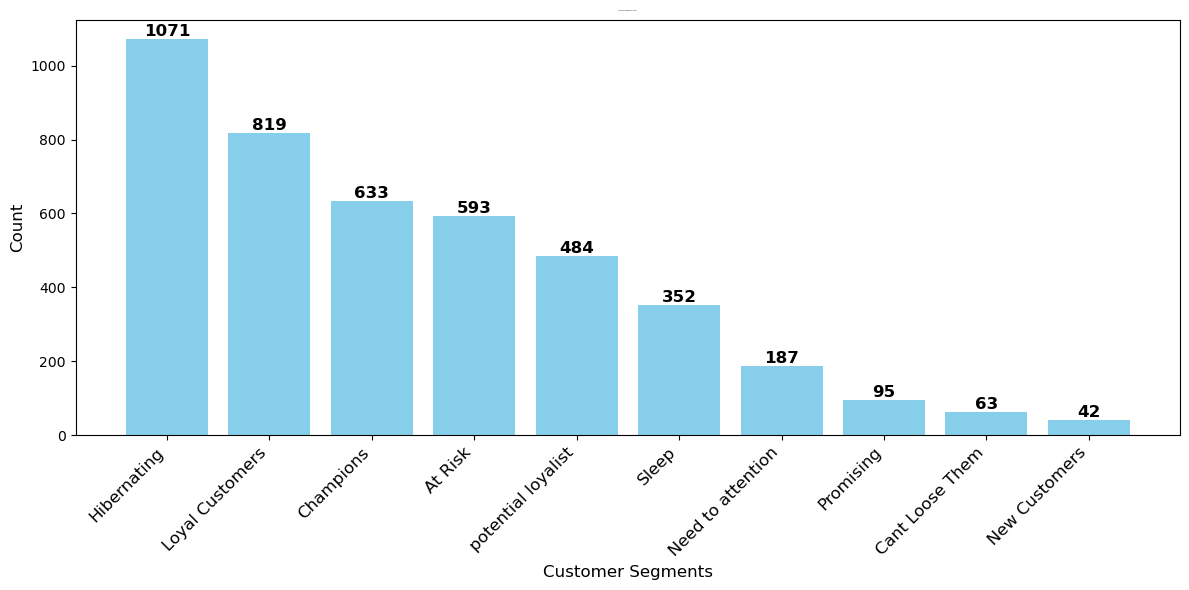

In [62]:
#visualize in bar chart
segment_counts = rfm["customer_segment"].value_counts()
fig, ax = plt.subplots(figsize=(12,6))
bars = ax.bar(segment_counts.index, segment_counts, color='skyblue')
for bar, count in zip(bars, segment_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=12, color='black')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title("Customer Segments Count", fontsize=1)
plt.xlabel('Customer Segments', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  
plt.show()

In [63]:
segment_percentages = (100 * segment_counts / rfm.shape[0]).round(1) #what is the percentage distribution of each segment?
seg_perc = ('%' + segment_percentages.astype(str))#add % sign and convert to string value
seg_perc

Hibernating           %24.7
Loyal Customers       %18.9
Champions             %14.6
At Risk               %13.7
potential loyalist    %11.2
Sleep                  %8.1
Need to attention      %4.3
Promising              %2.2
Cant Loose Them        %1.5
New Customers          %1.0
Name: customer_segment, dtype: object

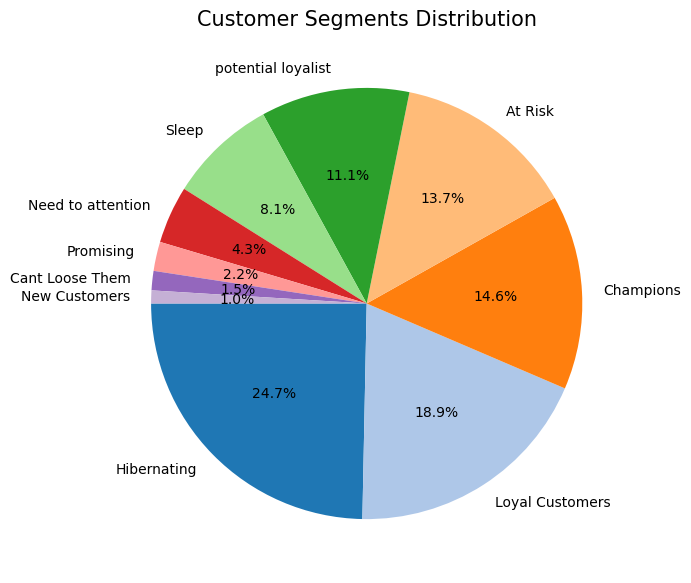

In [137]:
#visualize in pie chart
segments = seg_perc.index
percentages = segment_percentages
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(percentages, labels=segments, autopct='%1.1f%%', startangle=180, colors=plt.cm.tab20.colors)
plt.title("Customer Segments Distribution", fontsize=15)
plt.show()

We can create a csv file by defining a separate dataframe for the identified customers. For example, let's put the customers in the 'at risk' segment in a separate csv file.

In [64]:
customer_at_risk=pd.DataFrame()

In [65]:
customer_at_risk=rfm[rfm['customer_segment']=='At Risk']['Monetary'].sort_values(ascending=False)

In [66]:
customer_at_risk 

CustomerID
15749.0    44534.30
15098.0    39916.50
12409.0    11072.67
16182.0     6617.65
15032.0     4959.10
             ...   
16792.0      110.38
16498.0      100.97
15422.0       97.70
17991.0       93.35
14682.0       52.00
Name: Monetary, Length: 593, dtype: float64

In [ ]:
#Create a new csv with the amount earned to the company by customers in the "at risk" segment

In [67]:
customer_at_risk.to_csv('at_risk_0724.csv')

## CLTV

Customer Lifetime Value (CLTV) analysis is crucial for estimating the total value customers bring to a business, guiding strategic decision-making.

Customer Lifetime Value (CLTV) is a prediction of the net profit attributed to the entire future relationship with a customer. The formula for CLTV can vary based on the business model and the available data, but a common and simple formula is:

CLTV=
Average Purchase Value(APV)
×
Purchase Frequency(PF)
×
Customer Lifespan(CL)/
Customer Churn Rate (CCR)


Here's a breakdown of the components:

* Average Purchase Value (APV): The average amount a customer spends per purchase.
* Purchase Frequency (PF): The average number of purchases a customer makes in a specific period.
* Customer Lifespan (CL): The average duration (usually in years) a customer continues to make purchases.
* Customer Churn Rate (CCR): The percentage of customers who stop buying from a business in a given period.



In [ ]:
#we subtract from today's date the date when the customer first made a purchase. We find the tenure value. we subtract from today's date the date when the customer first made a purchase. 
#Let's calculate the tenure value for each customer separately.
#today_date-invoicedate.min()

In [ ]:
# We could actually calculate cltv using the rfm values we calculated above, 
#but let's create a new dataframe named cltv to avoid confusion.

In [104]:
cltv=df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today_date-x.min()).days, #recency value                                 
                                      'InvoiceNo':'nunique', #frequency value
                                      'Total Price':'sum' #monetary value
                                     })
cltv.columns = ["recency", "frequency", "monetary"] #set the column names.

In [106]:
#CLTV

#Profit Margin (profit_margin =  total_price * 0.10) #0.10 is information that should be determined by the company
cltv["profit_margin"] = cltv["monetary"] * 0.10

#Churn Rate = 1 - Rate of Customers Who Make More Than One Purchase
#Repeat Rate = Number of Customers Who Shop More Than Once / Total Number of Customers
repeat_rate = cltv[cltv["frequency"] > 1].shape[0] / cltv.shape[0]
churn_rate = 1 - repeat_rate

#Purchase Frequency (total_transaction / total_number_of_customers)
cltv["purchase_frequency"] = cltv["frequency"] / cltv.shape[0]


#Average Order Value (average_order_value = total_price / total_transaction)
cltv["average_order_value"] = cltv["monetary"] / cltv["frequency"]


#Customer Value (customer_value = average_order_value * purchase_frequency)
cltv["customer_value"] = cltv["average_order_value"] * cltv["purchase_frequency"]

###-------------------------
# Customer Lifetime Value (CLTV = (customer_value / churn_rate) x profit_margin)
###---------------------
cltv["cltv"] = (cltv["customer_value"] / churn_rate) * cltv["profit_margin"]

cltv.sort_values(by = "cltv", ascending=False).head(20)

,recency,frequency,monetary,profit_margin,purchase_frequency,average_order_value,customer_value,cltv
CustomerID,,,,,,,,
14646.0,355,74,280206.02,28020.602,0.017055,3786.567838,64.578479,5.255382e+06
18102.0,368,60,259657.30,25965.730,0.013828,4327.621667,59.842660,4.512846e+06
17450.0,368,46,194390.79,19439.079,0.010602,4225.886739,44.800827,2.529302e+06
16446.0,206,2,168472.50,16847.250,0.000461,84236.250000,38.827495,1.899798e+06
14911.0,374,201,143711.17,14371.117,0.046324,714.980945,33.120804,1.382390e+06
12415.0,338,21,124914.53,12491.453,0.004840,5948.310952,28.788783,1.044420e+06
14156.0,372,55,117210.08,11721.008,0.012676,2131.092364,27.013155,9.195584e+05
17511.0,374,31,91062.38,9106.238,0.007145,2937.496129,20.986951,5.550440e+05
16029.0,374,63,80850.84,8085.084,0.014519,1283.346667,18.633519,4.375407e+05


In [107]:
cltv['cltv_segment']=pd.qcut(cltv['cltv'],5,labels=['E','D','C','B','A']) 
# Let's segment the customers whose cltv values are calculated as in rfm.

In [108]:
cltv['cltv_segment']

CustomerID
12346.0    A
12347.0    A
12348.0    B
12349.0    B
12350.0    D
          ..
18280.0    E
18281.0    E
18282.0    E
18283.0    B
18287.0    B
Name: cltv_segment, Length: 4339, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [109]:
rfm_cltv_df= pd.merge(cltv, rfm, on='CustomerID', how='inner') # combine both of dataframes

In [125]:
rfm_cltv_df.reset_index(inplace=True)

In [126]:
rfm_cltv_segment_df=rfm_cltv_df[['CustomerID', 'customer_segment', 'cltv_segment']].copy()
# make a dataframe with only these variables

In [127]:
rfm_cltv_segment_df

,CustomerID,customer_segment,cltv_segment
0,12346.0,Hibernating,A
1,12347.0,Champions,A
2,12348.0,At Risk,B
3,12349.0,Promising,B
4,12350.0,Hibernating,D
...,...,...,...
4334,18280.0,Hibernating,E
4335,18281.0,Hibernating,E
4336,18282.0,potential loyalist,E
4337,18283.0,Champions,B


In [ ]:
#we can create any filters and we want.we can create any filters we want.
#We can even throw these filters into a separate excel or csv file and visualize them in detail in MS POWER BI

In [143]:
filtered_df = rfm_cltv_segment_df[
    (rfm_cltv_segment_df['cltv_segment'].isin(['A', 'B'])) &
    (rfm_cltv_segment_df['customer_segment'].isin(['Hibernating', 'At Risk', 'Need Attention']))
] #filtering

In [145]:
from IPython.display import display
display(filtered_df)

,CustomerID,customer_segment,cltv_segment
0,12346.0,Hibernating,A
2,12348.0,At Risk,B
7,12354.0,Hibernating,B
26,12377.0,Hibernating,B
27,12378.0,Hibernating,A
...,...,...,...
4275,18202.0,At Risk,B
4300,18231.0,At Risk,A
4306,18239.0,At Risk,B
4309,18242.0,At Risk,A


In [164]:
pivot_df = filtered_df.pivot_table(index='customer_segment',columns='customer_segment', aggfunc='size') #pivot table

In [165]:
pivot_df 

customer_segment,At Risk,Hibernating
cltv_segment,,
E,0,0
D,0,0
C,0,0
B,158,63
A,53,16


In [166]:
filtered_df.to_csv('A_B_segments_0724') # save as csv format file

In [170]:
filtered_df_A = rfm_cltv_segment_df[
    (rfm_cltv_segment_df['cltv_segment']=='A') &
    (rfm_cltv_segment_df['customer_segment'].isin(['Hibernating', 'At Risk', 'Need Attention']))
] #filtering

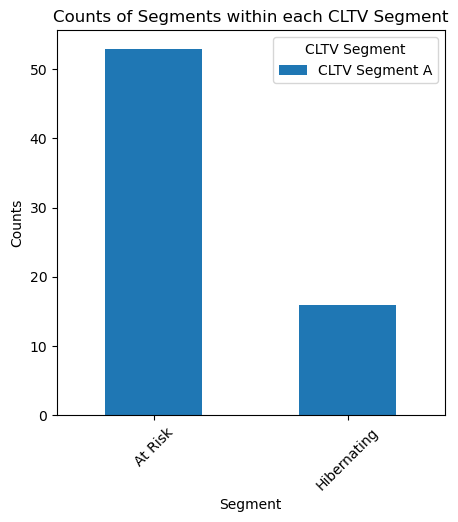

In [174]:
#visualizing filtering
fig, ax = plt.subplots(figsize=(5,5))

for cltv_segment in filtered_df_A['cltv_segment'].unique():
    subset = filtered_df_A[filtered_df_A['cltv_segment'] == cltv_segment]
    segment_counts = subset['customer_segment'].value_counts()
    segment_counts.plot(kind='bar', ax=ax, label=f'CLTV Segment {cltv_segment}')

ax.set_xlabel('Segment')
ax.set_ylabel('Counts')
ax.set_title('Counts of Segments within each CLTV Segment')
ax.legend(title='CLTV Segment')

plt.xticks(rotation=45)
plt.show()